In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import tensorflow as tf
import numpy as np
import time
from datetime import timedelta
import os
import glob
from skimage import io, transform

import inception

from sklearn import tree
from sklearn.svm import SVC
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestClassifier

learn = tf.contrib.learn

## Load Data for Own images

In [2]:
path = './data/data/'
w = 512
h = 512
c = 3


In [3]:
def read_img(path):
    cate = [path + x for x in os.listdir(path) if os.path.isdir(path + x)]
    imgs = []
    cls = []
    labels = []
    
    
    classname = [x for x in os.listdir(path) if os.path.isdir(path + x)]
    
    for idx, folder in enumerate(cate):
        for im in glob.glob(folder + '/*.jpg'):
            print('reading the images:%s' % (im))
            single_label = [0 for x in range(8)]
            single_label[idx] = 1;
            img = io.imread(im)
            img = transform.resize(img, (w, h, c))
            imgs.append(img)
            cls.append(idx)
            labels.append(single_label)
    return np.asarray(imgs, np.float32), np.asarray(cls, np.int32), classname, np.asarray(labels, np.int32)

In [4]:
data, cls,classnames,labels = read_img(path)

reading the images:./data/data/scatter plot/63.jpg
reading the images:./data/data/scatter plot/77.jpg
reading the images:./data/data/scatter plot/837.jpg
reading the images:./data/data/scatter plot/638.jpg


/Users/qiaozhijie/anaconda3/envs/python36/lib/python3.6/site-packages/skimage/transform/_warps.py:84: UserWarning: The default mode, 'constant', will be changed to 'reflect' in skimage 0.15.
  warn("The default mode, 'constant', will be changed to 'reflect' in "


reading the images:./data/data/scatter plot/604.jpg
reading the images:./data/data/scatter plot/162.jpg
reading the images:./data/data/scatter plot/176.jpg
reading the images:./data/data/scatter plot/610.jpg
reading the images:./data/data/scatter plot/348.jpg
reading the images:./data/data/scatter plot/412.jpg
reading the images:./data/data/scatter plot/374.jpg
reading the images:./data/data/scatter plot/566.jpg
reading the images:./data/data/scatter plot/200.jpg
reading the images:./data/data/scatter plot/758.jpg
reading the images:./data/data/scatter plot/770.jpg
reading the images:./data/data/scatter plot/764.jpg
reading the images:./data/data/scatter plot/765.jpg
reading the images:./data/data/scatter plot/771.jpg
reading the images:./data/data/scatter plot/201.jpg
reading the images:./data/data/scatter plot/215.jpg
reading the images:./data/data/scatter plot/573.jpg
reading the images:./data/data/scatter plot/413.jpg
reading the images:./data/data/scatter plot/375.jpg
reading the 

reading the images:./data/data/scatter plot/289.jpg
reading the images:./data/data/scatter plot/464.jpg
reading the images:./data/data/scatter plot/302.jpg
reading the images:./data/data/scatter plot/672.jpg
reading the images:./data/data/scatter plot/114.jpg
reading the images:./data/data/scatter plot/100.jpg
reading the images:./data/data/scatter plot/128.jpg
reading the images:./data/data/scatter plot/29.jpg
reading the images:./data/data/scatter plot/15.jpg
reading the images:./data/data/scatter plot/841.jpg
reading the images:./data/data/scatter plot/699.jpg
reading the images:./data/data/scatter plot/843.jpg
reading the images:./data/data/scatter plot/658.jpg
reading the images:./data/data/scatter plot/102.jpg
reading the images:./data/data/scatter plot/499.jpg
reading the images:./data/data/scatter plot/328.jpg
reading the images:./data/data/scatter plot/300.jpg
reading the images:./data/data/scatter plot/466.jpg
reading the images:./data/data/scatter plot/274.jpg
reading the im

reading the images:./data/data/scatter plot/334.jpg
reading the images:./data/data/scatter plot/491.jpg
reading the images:./data/data/scatter plot/644.jpg
reading the images:./data/data/scatter plot/122.jpg
reading the images:./data/data/scatter plot/650.jpg
reading the images:./data/data/scatter plot/678.jpg
reading the images:./data/data/scatter plot/687.jpg
reading the images:./data/data/scatter plot/23.jpg
reading the images:./data/data/scatter plot/37.jpg
reading the images:./data/data/scatter plot/697.jpg
reading the images:./data/data/scatter plot/683.jpg
reading the images:./data/data/scatter plot/33.jpg
reading the images:./data/data/scatter plot/27.jpg
reading the images:./data/data/scatter plot/126.jpg
reading the images:./data/data/scatter plot/640.jpg
reading the images:./data/data/scatter plot/668.jpg
reading the images:./data/data/scatter plot/495.jpg
reading the images:./data/data/scatter plot/481.jpg
reading the images:./data/data/scatter plot/330.jpg
reading the imag

reading the images:./data/data/scatter plot/544.jpg
reading the images:./data/data/scatter plot/236.jpg
reading the images:./data/data/scatter plot/785.jpg
reading the images:./data/data/scatter plot/752.jpg
reading the images:./data/data/scatter plot/753.jpg
reading the images:./data/data/scatter plot/747.jpg
reading the images:./data/data/scatter plot/790.jpg
reading the images:./data/data/scatter plot/784.jpg
reading the images:./data/data/scatter plot/551.jpg
reading the images:./data/data/scatter plot/237.jpg
reading the images:./data/data/scatter plot/223.jpg
reading the images:./data/data/scatter plot/545.jpg
reading the images:./data/data/scatter plot/425.jpg
reading the images:./data/data/scatter plot/343.jpg
reading the images:./data/data/scatter plot/357.jpg
reading the images:./data/data/scatter plot/431.jpg
reading the images:./data/data/scatter plot/380.jpg
reading the images:./data/data/scatter plot/141.jpg
reading the images:./data/data/scatter plot/627.jpg
reading the 

reading the images:./data/data/bar chart/377.jpg
reading the images:./data/data/bar chart/411.jpg
reading the images:./data/data/bar chart/405.jpg
reading the images:./data/data/bar chart/559.jpg
reading the images:./data/data/bar chart/203.jpg
reading the images:./data/data/bar chart/565.jpg
reading the images:./data/data/bar chart/571.jpg
reading the images:./data/data/bar chart/217.jpg
reading the images:./data/data/bar chart/798.jpg
reading the images:./data/data/bar chart/773.jpg
reading the images:./data/data/bar chart/772.jpg
reading the images:./data/data/bar chart/766.jpg
reading the images:./data/data/bar chart/799.jpg
reading the images:./data/data/bar chart/570.jpg
reading the images:./data/data/bar chart/216.jpg
reading the images:./data/data/bar chart/202.jpg
reading the images:./data/data/bar chart/564.jpg
reading the images:./data/data/bar chart/404.jpg
reading the images:./data/data/bar chart/362.jpg
reading the images:./data/data/bar chart/376.jpg
reading the images:.

reading the images:./data/data/bar chart/649.jpg
reading the images:./data/data/bar chart/488.jpg
reading the images:./data/data/bar chart/311.jpg
reading the images:./data/data/bar chart/477.jpg
reading the images:./data/data/bar chart/463.jpg
reading the images:./data/data/bar chart/305.jpg
reading the images:./data/data/bar chart/339.jpg
reading the images:./data/data/bar chart/265.jpg
reading the images:./data/data/bar chart/517.jpg
reading the images:./data/data/bar chart/259.jpg
reading the images:./data/data/bar chart/701.jpg
reading the images:./data/data/bar chart/728.jpg
reading the images:./data/data/bar chart/714.jpg
reading the images:./data/data/bar chart/258.jpg
reading the images:./data/data/bar chart/270.jpg
reading the images:./data/data/bar chart/502.jpg
reading the images:./data/data/bar chart/338.jpg
reading the images:./data/data/bar chart/462.jpg
reading the images:./data/data/bar chart/304.jpg
reading the images:./data/data/bar chart/310.jpg
reading the images:.

reading the images:./data/data/bar chart/735.jpg
reading the images:./data/data/bar chart/537.jpg
reading the images:./data/data/bar chart/251.jpg
reading the images:./data/data/bar chart/245.jpg
reading the images:./data/data/bar chart/523.jpg
reading the images:./data/data/bar chart/292.jpg
reading the images:./data/data/bar chart/286.jpg
reading the images:./data/data/bar chart/319.jpg
reading the images:./data/data/bar chart/443.jpg
reading the images:./data/data/bar chart/325.jpg
reading the images:./data/data/bar chart/331.jpg
reading the images:./data/data/bar chart/457.jpg
reading the images:./data/data/bar chart/480.jpg
reading the images:./data/data/bar chart/494.jpg
reading the images:./data/data/bar chart/669.jpg
reading the images:./data/data/bar chart/133.jpg
reading the images:./data/data/bar chart/866.jpg
reading the images:./data/data/bar chart/682.jpg
reading the images:./data/data/bar chart/680.jpg
reading the images:./data/data/bar chart/18.jpg
reading the images:./

reading the images:./data/data/bar chart/637.jpg
reading the images:./data/data/bar chart/93.jpg
reading the images:./data/data/bar chart/87.jpg
reading the images:./data/data/bar chart/179.jpg
reading the images:./data/data/bar chart/390.jpg
reading the images:./data/data/bar chart/384.jpg
reading the images:./data/data/bar chart/435.jpg
reading the images:./data/data/bar chart/347.jpg
reading the images:./data/data/bar chart/421.jpg
reading the images:./data/data/bar chart/409.jpg
reading the images:./data/data/bar chart/582.jpg
reading the images:./data/data/bar chart/227.jpg
reading the images:./data/data/bar chart/233.jpg
reading the images:./data/data/bar chart/555.jpg
reading the images:./data/data/bar chart/569.jpg
reading the images:./data/data/bar chart/780.jpg
reading the images:./data/data/bar chart/794.jpg
reading the images:./data/data/bar chart/743.jpg
reading the images:./data/data/bar chart/757.jpg
reading the images:./data/data/bar chart/756.jpg
reading the images:./d

reading the images:./data/data/pie chart/404.jpg
reading the images:./data/data/pie chart/362.jpg
reading the images:./data/data/pie chart/376.jpg
reading the images:./data/data/pie chart/410.jpg
reading the images:./data/data/pie chart/438.jpg
reading the images:./data/data/pie chart/389.jpg
reading the images:./data/data/pie chart/160.jpg
reading the images:./data/data/pie chart/606.jpg
reading the images:./data/data/pie chart/612.jpg
reading the images:./data/data/pie chart/174.jpg
reading the images:./data/data/pie chart/809.jpg
reading the images:./data/data/pie chart/49.jpg
reading the images:./data/data/pie chart/821.jpg
reading the images:./data/data/pie chart/61.jpg
reading the images:./data/data/pie chart/835.jpg
reading the images:./data/data/pie chart/59.jpg
reading the images:./data/data/pie chart/819.jpg
reading the images:./data/data/pie chart/71.jpg
reading the images:./data/data/pie chart/831.jpg
reading the images:./data/data/pie chart/65.jpg
reading the images:./data

reading the images:./data/data/pie chart/261.jpg
reading the images:./data/data/pie chart/249.jpg
reading the images:./data/data/pie chart/301.jpg
reading the images:./data/data/pie chart/467.jpg
reading the images:./data/data/pie chart/473.jpg
reading the images:./data/data/pie chart/315.jpg
reading the images:./data/data/pie chart/329.jpg
reading the images:./data/data/pie chart/498.jpg
reading the images:./data/data/pie chart/665.jpg
reading the images:./data/data/pie chart/103.jpg
reading the images:./data/data/pie chart/117.jpg
reading the images:./data/data/pie chart/659.jpg
reading the images:./data/data/pie chart/881.jpg
reading the images:./data/data/pie chart/842.jpg
reading the images:./data/data/pie chart/856.jpg
reading the images:./data/data/pie chart/16.jpg
reading the images:./data/data/pie chart/12.jpg
reading the images:./data/data/pie chart/852.jpg
reading the images:./data/data/pie chart/846.jpg
reading the images:./data/data/pie chart/675.jpg
reading the images:./d

reading the images:./data/data/pie chart/269.jpg
reading the images:./data/data/pie chart/527.jpg
reading the images:./data/data/pie chart/241.jpg
reading the images:./data/data/pie chart/255.jpg
reading the images:./data/data/pie chart/533.jpg
reading the images:./data/data/pie chart/719.jpg
reading the images:./data/data/pie chart/725.jpg
reading the images:./data/data/pie chart/730.jpg
reading the images:./data/data/pie chart/718.jpg
reading the images:./data/data/pie chart/254.jpg
reading the images:./data/data/pie chart/532.jpg
reading the images:./data/data/pie chart/526.jpg
reading the images:./data/data/pie chart/268.jpg
reading the images:./data/data/pie chart/297.jpg
reading the images:./data/data/pie chart/283.jpg
reading the images:./data/data/pie chart/320.jpg
reading the images:./data/data/pie chart/452.jpg
reading the images:./data/data/pie chart/334.jpg
reading the images:./data/data/pie chart/485.jpg
reading the images:./data/data/pie chart/491.jpg
reading the images:.

reading the images:./data/data/pie chart/432.jpg
reading the images:./data/data/pie chart/354.jpg
reading the images:./data/data/pie chart/340.jpg
reading the images:./data/data/pie chart/426.jpg
reading the images:./data/data/pie chart/368.jpg
reading the images:./data/data/pie chart/397.jpg
reading the images:./data/data/pie chart/383.jpg
reading the images:./data/data/pie chart/156.jpg
reading the images:./data/data/pie chart/630.jpg
reading the images:./data/data/pie chart/624.jpg
reading the images:./data/data/pie chart/142.jpg
reading the images:./data/data/pie chart/80.jpg
reading the images:./data/data/pie chart/181.jpg
reading the images:./data/data/pie chart/5.jpg
reading the images:./data/data/pie chart/817.jpg
reading the images:./data/data/pie chart/57.jpg
reading the images:./data/data/pie chart/803.jpg
reading the images:./data/data/pie chart/43.jpg
reading the images:./data/data/pie chart/55.jpg
reading the images:./data/data/pie chart/815.jpg
reading the images:./data/

reading the images:./data/data/pie chart/580.jpg
reading the images:./data/data/pie chart/594.jpg
reading the images:./data/data/pie chart/379.jpg
reading the images:./data/data/pie chart/351.jpg
reading the images:./data/data/pie chart/437.jpg
reading the images:./data/data/pie chart/345.jpg
reading the images:./data/data/pie chart/392.jpg
reading the images:./data/data/pie chart/386.jpg
reading the images:./data/data/pie chart/91.jpg
reading the images:./data/data/pie chart/609.jpg
reading the images:./data/data/pie chart/635.jpg
reading the images:./data/data/pie chart/153.jpg
reading the images:./data/data/pie chart/147.jpg
reading the images:./data/data/pie chart/621.jpg
reading the images:./data/data/pie chart/812.jpg
reading the images:./data/data/pie chart/52.jpg
reading the images:./data/data/pie chart/0.jpg
reading the images:./data/data/pie chart/806.jpg
reading the images:./data/data/pie chart/46.jpg
reading the images:./data/data/pie chart/184.jpg
reading the images:./data

reading the images:./data/data/heatmap map/166.jpg
reading the images:./data/data/heatmap map/98.jpg
reading the images:./data/data/heatmap map/600.jpg
reading the images:./data/data/heatmap map/833.jpg
reading the images:./data/data/heatmap map/73.jpg
reading the images:./data/data/heatmap map/199.jpg
reading the images:./data/data/heatmap map/67.jpg
reading the images:./data/data/heatmap map/9.jpg
reading the images:./data/data/heatmap map/698.jpg
reading the images:./data/data/heatmap map/868.jpg
reading the images:./data/data/heatmap map/883.jpg
reading the images:./data/data/heatmap map/129.jpg
reading the images:./data/data/heatmap map/667.jpg
reading the images:./data/data/heatmap map/673.jpg
reading the images:./data/data/heatmap map/115.jpg
reading the images:./data/data/heatmap map/459.jpg
reading the images:./data/data/heatmap map/303.jpg
reading the images:./data/data/heatmap map/471.jpg
reading the images:./data/data/heatmap map/288.jpg
reading the images:./data/data/heatm

reading the images:./data/data/heatmap map/294.jpg
reading the images:./data/data/heatmap map/337.jpg
reading the images:./data/data/heatmap map/451.jpg
reading the images:./data/data/heatmap map/445.jpg
reading the images:./data/data/heatmap map/323.jpg
reading the images:./data/data/heatmap map/479.jpg
reading the images:./data/data/heatmap map/492.jpg
reading the images:./data/data/heatmap map/486.jpg
reading the images:./data/data/heatmap map/135.jpg
reading the images:./data/data/heatmap map/121.jpg
reading the images:./data/data/heatmap map/647.jpg
reading the images:./data/data/heatmap map/109.jpg
reading the images:./data/data/heatmap map/848.jpg
reading the images:./data/data/heatmap map/690.jpg
reading the images:./data/data/heatmap map/684.jpg
reading the images:./data/data/heatmap map/874.jpg
reading the images:./data/data/heatmap map/34.jpg
reading the images:./data/data/heatmap map/20.jpg
reading the images:./data/data/heatmap map/36.jpg
reading the images:./data/data/hea

reading the images:./data/data/heatmap map/143.jpg
reading the images:./data/data/heatmap map/631.jpg
reading the images:./data/data/heatmap map/396.jpg
reading the images:./data/data/heatmap map/427.jpg
reading the images:./data/data/heatmap map/433.jpg
reading the images:./data/data/heatmap map/355.jpg
reading the images:./data/data/heatmap map/590.jpg
reading the images:./data/data/heatmap map/584.jpg
reading the images:./data/data/heatmap map/209.jpg
reading the images:./data/data/heatmap map/235.jpg
reading the images:./data/data/heatmap map/553.jpg
reading the images:./data/data/heatmap map/547.jpg
reading the images:./data/data/heatmap map/792.jpg
reading the images:./data/data/heatmap map/786.jpg
reading the images:./data/data/heatmap map/751.jpg
reading the images:./data/data/heatmap map/744.jpg
reading the images:./data/data/heatmap map/750.jpg
reading the images:./data/data/heatmap map/778.jpg
reading the images:./data/data/heatmap map/787.jpg
reading the images:./data/data/

reading the images:./data/data/heatmap map/392.jpg
reading the images:./data/data/heatmap map/91.jpg
reading the images:./data/data/heatmap map/609.jpg
reading the images:./data/data/heatmap map/635.jpg
reading the images:./data/data/heatmap map/153.jpg
reading the images:./data/data/heatmap map/147.jpg
reading the images:./data/data/heatmap map/812.jpg
reading the images:./data/data/heatmap map/52.jpg
reading the images:./data/data/heatmap map/0.jpg
reading the images:./data/data/heatmap map/806.jpg
reading the images:./data/data/heatmap map/46.jpg
reading the images:./data/data/box plot/63.jpg
reading the images:./data/data/box plot/823.jpg
reading the images:./data/data/box plot/189.jpg
reading the images:./data/data/box plot/638.jpg
reading the images:./data/data/box plot/162.jpg
reading the images:./data/data/box plot/176.jpg
reading the images:./data/data/box plot/88.jpg
reading the images:./data/data/box plot/610.jpg
reading the images:./data/data/box plot/348.jpg
reading the im

reading the images:./data/data/box plot/711.jpg
reading the images:./data/data/box plot/739.jpg
reading the images:./data/data/box plot/275.jpg
reading the images:./data/data/box plot/513.jpg
reading the images:./data/data/box plot/261.jpg
reading the images:./data/data/box plot/249.jpg
reading the images:./data/data/box plot/473.jpg
reading the images:./data/data/box plot/329.jpg
reading the images:./data/data/box plot/498.jpg
reading the images:./data/data/box plot/103.jpg
reading the images:./data/data/box plot/671.jpg
reading the images:./data/data/box plot/659.jpg
reading the images:./data/data/box plot/16.jpg
reading the images:./data/data/box plot/12.jpg
reading the images:./data/data/box plot/107.jpg
reading the images:./data/data/box plot/661.jpg
reading the images:./data/data/box plot/649.jpg
reading the images:./data/data/box plot/488.jpg
reading the images:./data/data/box plot/311.jpg
reading the images:./data/data/box plot/477.jpg
reading the images:./data/data/box plot/46

reading the images:./data/data/box plot/708.jpg
reading the images:./data/data/box plot/709.jpg
reading the images:./data/data/box plot/251.jpg
reading the images:./data/data/box plot/523.jpg
reading the images:./data/data/box plot/292.jpg
reading the images:./data/data/box plot/443.jpg
reading the images:./data/data/box plot/325.jpg
reading the images:./data/data/box plot/331.jpg
reading the images:./data/data/box plot/457.jpg
reading the images:./data/data/box plot/480.jpg
reading the images:./data/data/box plot/494.jpg
reading the images:./data/data/box plot/669.jpg
reading the images:./data/data/box plot/127.jpg
reading the images:./data/data/box plot/641.jpg
reading the images:./data/data/box plot/696.jpg
reading the images:./data/data/box plot/18.jpg
reading the images:./data/data/box plot/694.jpg
reading the images:./data/data/box plot/24.jpg
reading the images:./data/data/box plot/643.jpg
reading the images:./data/data/box plot/131.jpg
reading the images:./data/data/box plot/65

reading the images:./data/data/box plot/3.jpg
reading the images:./data/data/box plot/811.jpg
reading the images:./data/data/box plot/79.jpg
reading the images:./data/data/box plot/193.jpg
reading the images:./data/data/box plot/185.jpg
reading the images:./data/data/box plot/191.jpg
reading the images:./data/data/box plot/47.jpg
reading the images:./data/data/box plot/807.jpg
reading the images:./data/data/box plot/53.jpg
reading the images:./data/data/box plot/813.jpg
reading the images:./data/data/box plot/1.jpg
reading the images:./data/data/box plot/146.jpg
reading the images:./data/data/box plot/634.jpg
reading the images:./data/data/box plot/152.jpg
reading the images:./data/data/box plot/84.jpg
reading the images:./data/data/box plot/90.jpg
reading the images:./data/data/box plot/387.jpg
reading the images:./data/data/box plot/422.jpg
reading the images:./data/data/box plot/344.jpg
reading the images:./data/data/box plot/350.jpg
reading the images:./data/data/box plot/556.jpg
r

reading the images:./data/data/line chart/12.jpg
reading the images:./data/data/line chart/675.jpg
reading the images:./data/data/line chart/113.jpg
reading the images:./data/data/line chart/107.jpg
reading the images:./data/data/line chart/885.jpg
reading the images:./data/data/line chart/463.jpg
reading the images:./data/data/line chart/305.jpg
reading the images:./data/data/line chart/339.jpg
reading the images:./data/data/line chart/265.jpg
reading the images:./data/data/line chart/503.jpg
reading the images:./data/data/line chart/517.jpg
reading the images:./data/data/line chart/271.jpg
reading the images:./data/data/line chart/701.jpg
reading the images:./data/data/line chart/714.jpg
reading the images:./data/data/line chart/933.jpg
reading the images:./data/data/line chart/516.jpg
reading the images:./data/data/line chart/502.jpg
reading the images:./data/data/line chart/310.jpg
reading the images:./data/data/line chart/476.jpg
reading the images:./data/data/line chart/674.jpg
r

reading the images:./data/data/line chart/169.jpg
reading the images:./data/data/line chart/814.jpg
reading the images:./data/data/line chart/6.jpg
reading the images:./data/data/line chart/2.jpg
reading the images:./data/data/line chart/50.jpg
reading the images:./data/data/line chart/804.jpg
reading the images:./data/data/line chart/145.jpg
reading the images:./data/data/line chart/93.jpg
reading the images:./data/data/line chart/87.jpg
reading the images:./data/data/line chart/390.jpg
reading the images:./data/data/line chart/384.jpg
reading the images:./data/data/line chart/347.jpg
reading the images:./data/data/line chart/541.jpg
reading the images:./data/data/line chart/227.jpg
reading the images:./data/data/line chart/569.jpg
reading the images:./data/data/line chart/780.jpg
reading the images:./data/data/line chart/743.jpg
reading the images:./data/data/line chart/756.jpg
reading the images:./data/data/line chart/781.jpg
reading the images:./data/data/line chart/540.jpg
reading

reading the images:./data/data/rectangle treemap/588.jpg
reading the images:./data/data/rectangle treemap/577.jpg
reading the images:./data/data/rectangle treemap/760.jpg
reading the images:./data/data/rectangle treemap/774.jpg
reading the images:./data/data/rectangle treemap/238.jpg
reading the images:./data/data/rectangle treemap/204.jpg
reading the images:./data/data/rectangle treemap/562.jpg
reading the images:./data/data/rectangle treemap/370.jpg
reading the images:./data/data/rectangle treemap/416.jpg
reading the images:./data/data/rectangle treemap/364.jpg
reading the images:./data/data/rectangle treemap/614.jpg
reading the images:./data/data/rectangle treemap/98.jpg
reading the images:./data/data/rectangle treemap/833.jpg
reading the images:./data/data/rectangle treemap/827.jpg
reading the images:./data/data/rectangle treemap/67.jpg
reading the images:./data/data/rectangle treemap/9.jpg
reading the images:./data/data/rectangle treemap/698.jpg
reading the images:./data/data/rect

reading the images:./data/data/rectangle treemap/336.jpg
reading the images:./data/data/rectangle treemap/518.jpg
reading the images:./data/data/rectangle treemap/530.jpg
reading the images:./data/data/rectangle treemap/256.jpg
reading the images:./data/data/rectangle treemap/901.jpg
reading the images:./data/data/rectangle treemap/732.jpg
reading the images:./data/data/rectangle treemap/733.jpg
reading the images:./data/data/rectangle treemap/900.jpg
reading the images:./data/data/rectangle treemap/525.jpg
reading the images:./data/data/rectangle treemap/531.jpg
reading the images:./data/data/rectangle treemap/257.jpg
reading the images:./data/data/rectangle treemap/519.jpg
reading the images:./data/data/rectangle treemap/337.jpg
reading the images:./data/data/rectangle treemap/451.jpg
reading the images:./data/data/rectangle treemap/445.jpg
reading the images:./data/data/rectangle treemap/486.jpg
reading the images:./data/data/rectangle treemap/121.jpg
reading the images:./data/data/

reading the images:./data/data/rectangle treemap/369.jpg
reading the images:./data/data/rectangle treemap/355.jpg
reading the images:./data/data/rectangle treemap/590.jpg
reading the images:./data/data/rectangle treemap/235.jpg
reading the images:./data/data/rectangle treemap/553.jpg
reading the images:./data/data/rectangle treemap/221.jpg
reading the images:./data/data/rectangle treemap/751.jpg
reading the images:./data/data/rectangle treemap/745.jpg
reading the images:./data/data/rectangle treemap/744.jpg
reading the images:./data/data/rectangle treemap/787.jpg
reading the images:./data/data/rectangle treemap/793.jpg
reading the images:./data/data/rectangle treemap/220.jpg
reading the images:./data/data/rectangle treemap/552.jpg
reading the images:./data/data/rectangle treemap/208.jpg
reading the images:./data/data/rectangle treemap/585.jpg
reading the images:./data/data/rectangle treemap/591.jpg
reading the images:./data/data/rectangle treemap/432.jpg
reading the images:./data/data/

reading the images:./data/data/rectangle heatmap/77.jpg
reading the images:./data/data/rectangle heatmap/837.jpg
reading the images:./data/data/rectangle heatmap/162.jpg
reading the images:./data/data/rectangle heatmap/88.jpg
reading the images:./data/data/rectangle heatmap/610.jpg
reading the images:./data/data/rectangle heatmap/348.jpg
reading the images:./data/data/rectangle heatmap/360.jpg
reading the images:./data/data/rectangle heatmap/406.jpg
reading the images:./data/data/rectangle heatmap/374.jpg
reading the images:./data/data/rectangle heatmap/228.jpg
reading the images:./data/data/rectangle heatmap/214.jpg
reading the images:./data/data/rectangle heatmap/572.jpg
reading the images:./data/data/rectangle heatmap/566.jpg
reading the images:./data/data/rectangle heatmap/770.jpg
reading the images:./data/data/rectangle heatmap/764.jpg
reading the images:./data/data/rectangle heatmap/765.jpg
reading the images:./data/data/rectangle heatmap/771.jpg
reading the images:./data/data/re

reading the images:./data/data/rectangle heatmap/840.jpg
reading the images:./data/data/rectangle heatmap/14.jpg
reading the images:./data/data/rectangle heatmap/854.jpg
reading the images:./data/data/rectangle heatmap/883.jpg
reading the images:./data/data/rectangle heatmap/129.jpg
reading the images:./data/data/rectangle heatmap/673.jpg
reading the images:./data/data/rectangle heatmap/459.jpg
reading the images:./data/data/rectangle heatmap/465.jpg
reading the images:./data/data/rectangle heatmap/303.jpg
reading the images:./data/data/rectangle heatmap/471.jpg
reading the images:./data/data/rectangle heatmap/288.jpg
reading the images:./data/data/rectangle heatmap/539.jpg
reading the images:./data/data/rectangle heatmap/511.jpg
reading the images:./data/data/rectangle heatmap/277.jpg
reading the images:./data/data/rectangle heatmap/263.jpg
reading the images:./data/data/rectangle heatmap/505.jpg
reading the images:./data/data/rectangle heatmap/713.jpg
reading the images:./data/data/r

reading the images:./data/data/rectangle heatmap/887.jpg
reading the images:./data/data/rectangle heatmap/677.jpg
reading the images:./data/data/rectangle heatmap/663.jpg
reading the images:./data/data/rectangle heatmap/850.jpg
reading the images:./data/data/rectangle heatmap/688.jpg
reading the images:./data/data/rectangle heatmap/844.jpg
reading the images:./data/data/rectangle heatmap/38.jpg
reading the images:./data/data/rectangle heatmap/21.jpg
reading the images:./data/data/rectangle heatmap/861.jpg
reading the images:./data/data/rectangle heatmap/35.jpg
reading the images:./data/data/rectangle heatmap/685.jpg
reading the images:./data/data/rectangle heatmap/691.jpg
reading the images:./data/data/rectangle heatmap/849.jpg
reading the images:./data/data/rectangle heatmap/108.jpg
reading the images:./data/data/rectangle heatmap/120.jpg
reading the images:./data/data/rectangle heatmap/646.jpg
reading the images:./data/data/rectangle heatmap/134.jpg
reading the images:./data/data/rec

reading the images:./data/data/rectangle heatmap/870.jpg
reading the images:./data/data/rectangle heatmap/643.jpg
reading the images:./data/data/rectangle heatmap/125.jpg
reading the images:./data/data/rectangle heatmap/657.jpg
reading the images:./data/data/rectangle heatmap/119.jpg
reading the images:./data/data/rectangle heatmap/482.jpg
reading the images:./data/data/rectangle heatmap/327.jpg
reading the images:./data/data/rectangle heatmap/441.jpg
reading the images:./data/data/rectangle heatmap/455.jpg
reading the images:./data/data/rectangle heatmap/469.jpg
reading the images:./data/data/rectangle heatmap/290.jpg
reading the images:./data/data/rectangle heatmap/284.jpg
reading the images:./data/data/rectangle heatmap/521.jpg
reading the images:./data/data/rectangle heatmap/247.jpg
reading the images:./data/data/rectangle heatmap/904.jpg
reading the images:./data/data/rectangle heatmap/723.jpg
reading the images:./data/data/rectangle heatmap/736.jpg
reading the images:./data/data/

reading the images:./data/data/rectangle heatmap/435.jpg
reading the images:./data/data/rectangle heatmap/353.jpg
reading the images:./data/data/rectangle heatmap/421.jpg
reading the images:./data/data/rectangle heatmap/409.jpg
reading the images:./data/data/rectangle heatmap/582.jpg
reading the images:./data/data/rectangle heatmap/541.jpg
reading the images:./data/data/rectangle heatmap/227.jpg
reading the images:./data/data/rectangle heatmap/233.jpg
reading the images:./data/data/rectangle heatmap/555.jpg
reading the images:./data/data/rectangle heatmap/569.jpg
reading the images:./data/data/rectangle heatmap/780.jpg
reading the images:./data/data/rectangle heatmap/794.jpg
reading the images:./data/data/rectangle heatmap/756.jpg
reading the images:./data/data/rectangle heatmap/795.jpg
reading the images:./data/data/rectangle heatmap/781.jpg
reading the images:./data/data/rectangle heatmap/568.jpg
reading the images:./data/data/rectangle heatmap/232.jpg
reading the images:./data/data/

In [5]:
num_example = data.shape[0]
arr = np.arange(num_example)
np.random.shuffle(arr)
data = data[arr]
cls = cls[arr]
labels = labels[arr]

In [6]:
ratio = 0.8
s = np.int(num_example * ratio)
images_train = data[:s]
images_test = data[s:]
cls_train = cls[:s]
cls_test = cls[s:]
labels_train = labels[:s]
labels_test = labels[s:]

num_classes = 8

In [7]:
print("Size of:")
print("- Training-set:\t\t{}".format(len(images_train)))
print("- Test-set:\t\t{}".format(len(images_test)))

Size of:
- Training-set:		3816
- Test-set:		955


### Helper-function for plotting images

Function used to plot at most 9 images in a 3x3 grid, and writing the true and predicted classes below each image.

In [8]:
def plot_images(images, cls_true, cls_pred=None, smooth=True):

    assert len(images) == len(cls_true)

    # Create figure with sub-plots.
    fig, axes = plt.subplots(3, 3)

    # Adjust vertical spacing.
    if cls_pred is None:
        hspace = 0.3
    else:
        hspace = 0.6
    fig.subplots_adjust(hspace=hspace, wspace=0.3)

    # Interpolation type.
    if smooth:
        interpolation = 'spline16'
    else:
        interpolation = 'nearest'

    for i, ax in enumerate(axes.flat):
        # There may be less than 9 images, ensure it doesn't crash.
        if i < len(images):
            # Plot image.
            ax.imshow(images[i],
                      interpolation=interpolation)

            # Name of the true class.
            #cls_true_name = class_names[cls_true[i]]
            cls_true_name = classnames[cls_true[i]]

            # Show true and predicted classes.
            if cls_pred is None:
                xlabel = "True: {0}".format(cls_true_name)
            else:
                # Name of the predicted class.
                cls_pred_name = classnames[cls_pred[i]]

                xlabel = "True: {0}\nPred: {1}".format(cls_true_name, cls_pred_name)

            # Show the classes as the label on the x-axis.
            ax.set_xlabel(xlabel)
        
        # Remove ticks from the plot.
        ax.set_xticks([])
        ax.set_yticks([])
    
    # Ensure the plot is shown correctly with multiple plots
    # in a single Notebook cell.
    plt.show()

### Plot a few images to see if data is correct

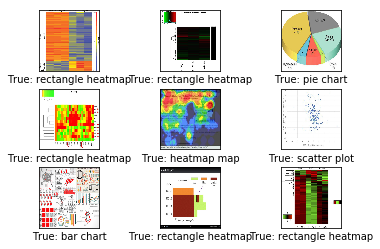

In [9]:
# Get the first images from the test-set.
images = images_test[0:9]

# Get the true classes for those images.
cls_true = cls_test[0:9]

# Plot the images and labels using our helper-function above.
plot_images(images=images, cls_true=cls_true, smooth=False)

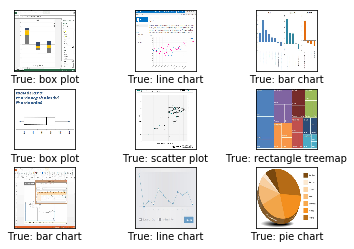

In [10]:
# Get the first images from the test-set.
images_t = images_train[0:9]

# Get the true classes for those images.
cls_t = cls_train[0:9]

# Plot the images and labels using our helper-function above.
plot_images(images=images_t, cls_true=cls_t, smooth=False)

In [11]:
inception.maybe_download()

Data has apparently already been downloaded and unpacked.


In [12]:
model = inception.Inception()

In [13]:
from inception import transfer_values_cache

In [14]:
file_path_cache_train = os.path.join(path, 'inception_train.pkl')
file_path_cache_test = os.path.join(path, 'inception_test.pkl')

In [15]:
print("Processing Inception transfer-values for training-images ...")

# Scale images because Inception needs pixels to be between 0 and 255,
# while the CIFAR-10 functions return pixels between 0.0 and 1.0
images_scaled = images_train * 255.0
#images_scaled = images_train
# If transfer-values have already been calculated then reload them,
# otherwise calculate them and save them to a cache-file.
transfer_values_train = transfer_values_cache(cache_path=file_path_cache_train,
                                              images=images_scaled,
                                              model=model)

Processing Inception transfer-values for training-images ...
- Processing image:   3816 / 3816
- Data saved to cache-file: ./data/data/inception_train.pkl


In [16]:
print("Processing Inception transfer-values for test-images ...")

# Scale images because Inception needs pixels to be between 0 and 255,
# while the CIFAR-10 functions return pixels between 0.0 and 1.0
images_scaled = images_test * 255.0
#images_scaled = images_test
# If transfer-values have already been calculated then reload them,
# otherwise calculate them and save them to a cache-file.
transfer_values_test = transfer_values_cache(cache_path=file_path_cache_test,
                                             images=images_scaled,
                                             model=model)

Processing Inception transfer-values for test-images ...
- Processing image:    955 / 955
- Data saved to cache-file: ./data/data/inception_test.pkl


In [ ]:
ESTIMATORS = {
    "Linear regression": LinearRegression(),
    "SVC": SVC(),
    "Random Forest": RandomForestClassifier(),
    "Decision Tree": tree.DecisionTreeClassifier(),
}

In [ ]:
cls_test_predict = dict()
for name, estimator in ESTIMATORS.items():
    print("estimator: {} fit start".format(name))
    estimator.fit(transfer_values_train, cls_train)
    print("estimator: {} fit complete".format(name))
    cls_test_predict[name] = estimator.predict(transfer_values_test)
    print("predict_complete: {}".format(name))

estimator: Linear regression fit start
estimator: Linear regression fit complete
predict_complete: Linear regression
estimator: SVC fit start
estimator: SVC fit complete


In [ ]:
def predict_cls(cls_true,cls_predict):
    correct = (cls_true==cls_predict)
    return correct.mean()

In [ ]:
for name, estimator in ESTIMATORS.items():
    predict = predict_cls(cls_test,cls_test_predict[name])
    print("{0}: {1:.1%}".format(name,predict))